## Dataset Overview

### Drivetrain
- **4WD/4X4**: Four-wheel drive
- **AWD**: All-wheel drive
- **CNG**: Compressed natural gas
- **FFV**: Flexible-fuel vehicle
- **NGV**: Natural gas vehicle
- **#**: High output engine (provides more power than the standard engine of the same size)

### Transmission
- **A**: Automatic
- **AM**: Automated manual
- **AS**: Automatic with select shift
- **AV**: Continuously variable
- **M**: Manual
- **3 - 10**: Number of gears

### Fuel Type
- **X**: Regular gasoline
- **Z**: Premium gasoline
- **D**: Diesel
- **E**: Ethanol (E85)
- **N**: Natural Gas

## Fuel Consumption
- City and highway fuel consumption ratings are shown in **litres per 100 kilometres (L/100 km)**.
- Combined rating (55% city, 45% highway) is shown in **L/100 km** and in **miles per imperial gallon (mpg)**.

## CO2 Emissions
- Estimated tailpipe carbon dioxide emissions (in grams per kilometre) are based on fuel type and the combined fuel consumption rating.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv("data.csv")
df.head(10)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2003.0,FORD,EXPLORER SPORT TRAC 4X4,PICKUP TRUCK - STANDARD,4.0,6.0,A5,X,15.4,10.7,13.3,21.0,306.0
1,2000.0,DAEWOO,LANOS,SUBCOMPACT,1.5,4.0,A4,X,9.9,5.9,8.1,35.0,186.0
2,2018.0,Honda,Civic Sedan,Mid-size,2.0,4.0,AV,X,7.8,6.0,7.0,40.0,163.0
3,2008.0,SAAB,9-3 CONVERTIBLE TURBO,SUBCOMPACT,2.8,6.0,AS6,Z,14.5,8.3,11.7,24.0,269.0
4,2005.0,HYUNDAI,TUCSON AWD,SUV,2.7,6.0,A4,X,12.3,8.8,10.7,26.0,246.0
5,2013.0,NISSAN,FRONTIER 4WD,PICKUP TRUCK - SMALL,4.0,6.0,M6,X,13.2,9.3,11.4,25.0,262.0
6,2016.0,KIA,K900,FULL-SIZE,5.0,8.0,AS8,X,15.6,10.6,13.4,21.0,318.0
7,2003.0,PONTIAC,GRAND AM,COMPACT,3.4,6.0,A4,X,11.0,6.7,9.1,31.0,209.0
8,2007.0,FORD,FREESTAR WAGON,MINIVAN,4.2,6.0,A4,X,14.0,9.5,12.0,24.0,276.0
9,2011.0,GMC,YUKON,SUV,5.3,8.0,A6,X,14.4,9.5,12.2,23.0,281.0


In [34]:
# Change the coulm name case
df.columns  = df.columns.str.title()
df

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Comb (Mpg),Emissions
0,2003.0,FORD,EXPLORER SPORT TRAC 4X4,PICKUP TRUCK - STANDARD,4.0,6.0,A5,X,15.4,10.7,13.3,21.0,306.0
1,2000.0,DAEWOO,LANOS,SUBCOMPACT,1.5,4.0,A4,X,9.9,5.9,8.1,35.0,186.0
2,2018.0,Honda,Civic Sedan,Mid-size,2.0,4.0,AV,X,7.8,6.0,7.0,40.0,163.0
3,2008.0,SAAB,9-3 CONVERTIBLE TURBO,SUBCOMPACT,2.8,6.0,AS6,Z,14.5,8.3,11.7,24.0,269.0
4,2005.0,HYUNDAI,TUCSON AWD,SUV,2.7,6.0,A4,X,12.3,8.8,10.7,26.0,246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22807,2011.0,SUBARU,IMPREZA AWD,COMPACT,2.5,4.0,M6,Z,12.4,8.8,10.8,26.0,248.0
22808,2017.0,MINI,COOPER CLUBMAN ALL4,MID-SIZE,1.5,3.0,AS8,Z,10.2,7.8,9.1,31.0,213.0
22809,2006.0,GMC,CANYON,PICKUP TRUCK - STANDARD,2.8,4.0,A4,X,13.7,9.2,11.7,24.0,269.0
22810,2013.0,AUDI,A3,STATION WAGON - SMALL,2.0,4.0,AS6,Z,9.4,6.9,8.3,34.0,191.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22812 entries, 0 to 22811
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              22765 non-null  float64
 1   Make              22812 non-null  object 
 2   Model             22812 non-null  object 
 3   Vehicle Class     22812 non-null  object 
 4   Engine Size       22772 non-null  float64
 5   Cylinders         22765 non-null  float64
 6   Transmission      22812 non-null  object 
 7   Fuel              22812 non-null  object 
 8   Fuel Consumption  22766 non-null  float64
 9   Hwy (L/100 Km)    22760 non-null  float64
 10  Comb (L/100 Km)   22772 non-null  float64
 11  Comb (Mpg)        22763 non-null  float64
 12  Emissions         22772 non-null  float64
dtypes: float64(8), object(5)
memory usage: 2.3+ MB


In [36]:
df.isna().sum() 

Year                47
Make                 0
Model                0
Vehicle Class        0
Engine Size         40
Cylinders           47
Transmission         0
Fuel                 0
Fuel Consumption    46
Hwy (L/100 Km)      52
Comb (L/100 Km)     40
Comb (Mpg)          49
Emissions           40
dtype: int64

In [37]:
print(f'Total Data Rows: {df.shape[0]}')
print(f'Total Data Columns: {df.shape[1]}')

Total Data Rows: 22812
Total Data Columns: 13


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,22765.0,2008.479947,79.754705,-97.0,2006.000,2012.0,2017.0,2022.0
Engine Size,22772.0,3.264149,2.858905,-100.0,2.300,3.0,4.2,8.4
Cylinders,22765.0,5.755634,3.079538,-100.0,4.000,6.0,8.0,16.0
Fuel Consumption,22766.0,12.661113,4.438603,-98.0,10.400,12.3,14.7,30.6
Hwy (L/100 Km),22760.0,8.823726,3.357721,-99.0,7.300,8.4,10.2,20.9
Comb (L/100 Km),22772.0,10.923529,4.126126,-100.0,9.075,10.5,12.7,26.1
Comb (Mpg),22763.0,27.226903,8.252583,-100.0,22.000,27.0,31.0,78.0
Emissions,22772.0,249.472817,60.748921,-99.0,209.000,242.0,288.0,608.0



**We Can See**
- Each of columns has anomaly data Year, Engine Size, Cylinders, Fuel Consumption, HWY, COMB and emission that doesn't any make sanse if negative

In [39]:
duplicated_rows = df[df.duplicated()]

num_duplicated_rows = duplicated_rows.shape[0]

print(f'Total number of duplicated rows: {num_duplicated_rows}')


Total number of duplicated rows: 1


In [40]:
duplicated_rows

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Comb (Mpg),Emissions
17702,2000.0,LAND ROVER,DISCOVERY SERIES II 4X4,SUV,4.0,8.0,A4,Z,17.7,12.7,15.4,18.0,354.0


**We Can See**
- Most of columns has missing value, year, engine size, Cylinder, fuel consumption, HWY, COMB (L/100 km), COMB (mpg) and, Emmisions. the range data per column that has missing value around 40-52 Data
- Some of datatype is not in accordance, like year, that should be categorical because has more value
- Dataset has only 1 duplicate entry

To get more information in EDA later, we want to clean data, furthurmore


- Unique Analysis
- Outliers Anaylysis using Z-score and IQR
- Changing data type
- Discovering invalid data 
- Remove minus data

1. Univariate Analysis

- Create function to visualized categorical columns using count plot
- create function that visualized numeric columns using box plot
- Discovering YEAR and see unique values 
- Discovering MAKE column
- Discovering MODEL column
- Discovering VEHICLE column
- Discovering ENGINE SIZE column
- Discovering CYLINDERS column
- Discovering FUEL (type) column
- Discovering HWY (L/100 km) column
- Discovering COMB (L/100 km) column
- Discovering COMB (mpg) column
- Discovering EMISSIONS column

2. Bivariate Analysis
- Numerical columns which are above value and below value of their own columns' mean
- Groupby MAKE to see their unique values in model
- Groupby Vehicle Class to see their unique values in MAKE
- Groupby Year with the most frequent of MAKE, MODEL, VEHICLE CLASS
- MAKE which has mean engine size above average
- MAKE and its mean engine size, cylinders
- MAKE and its most frequent TRANSMISSION
- Groupby FUEL and their unique value in transmission
- TRANSMISSION which has more fuel consumption than average
- FUEL TYPE which has more Emmission than average
- FUEL TYPE distribution based on their emmision average
- FUEL TYPE which has more FUEL CONSUMPTION
- FUEL CONSUMPTION distirbution Emmission than average 
- FUEL CONSUMPTION distirbution based on their emmision average (make it ranges)

3.  Multivariate Analysis
- Pair Plot 
- Heatmap of Correletaion
- 
- 


In [41]:
df_copy = df.copy()

In [42]:
df_copy.columns.tolist()

['Year',
 'Make',
 'Model',
 'Vehicle Class',
 'Engine Size',
 'Cylinders',
 'Transmission',
 'Fuel',
 'Fuel Consumption',
 'Hwy (L/100 Km)',
 'Comb (L/100 Km)',
 'Comb (Mpg)',
 'Emissions']

In [43]:
# Missing value handling 
numerical_cols = df_copy.select_dtypes(include=['number']).columns
df_copy[numerical_cols] = df_copy[numerical_cols].fillna(df_copy[numerical_cols].mean())

categorical_cols = df_copy.select_dtypes(include=['category', 'object']).columns
for col in categorical_cols:
    df_copy[col] = df_copy[col].fillna(df_copy[col].mode()[0])
    
df_copy.isna().sum()


Year                0
Make                0
Model               0
Vehicle Class       0
Engine Size         0
Cylinders           0
Transmission        0
Fuel                0
Fuel Consumption    0
Hwy (L/100 Km)      0
Comb (L/100 Km)     0
Comb (Mpg)          0
Emissions           0
dtype: int64

In [44]:
# Convert the Year column to integer, so we can convert to category
df_copy['Year'] = df_copy['Year'].fillna(0).astype(int)


In [45]:
# From our analysis, some of `make`, `Vehicle Class` and `model` columns have the different values but they are the same.
# we will replace with change the case of the values to lower case
df_copy['Vehicle Class']  = df_copy['Vehicle Class'].str.upper()
df_copy['Make']  = df_copy['Make'].str.upper()
df_copy['Model']  = df_copy['Model'].str.upper()

df_copy.head(10)


,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Comb (Mpg),Emissions
0,2003,FORD,EXPLORER SPORT TRAC 4X4,PICKUP TRUCK - STANDARD,4.0,6.0,A5,X,15.4,10.7,13.3,21.0,306.0
1,2000,DAEWOO,LANOS,SUBCOMPACT,1.5,4.0,A4,X,9.9,5.9,8.1,35.0,186.0
2,2018,HONDA,CIVIC SEDAN,MID-SIZE,2.0,4.0,AV,X,7.8,6.0,7.0,40.0,163.0
3,2008,SAAB,9-3 CONVERTIBLE TURBO,SUBCOMPACT,2.8,6.0,AS6,Z,14.5,8.3,11.7,24.0,269.0
4,2005,HYUNDAI,TUCSON AWD,SUV,2.7,6.0,A4,X,12.3,8.8,10.7,26.0,246.0
5,2013,NISSAN,FRONTIER 4WD,PICKUP TRUCK - SMALL,4.0,6.0,M6,X,13.2,9.3,11.4,25.0,262.0
6,2016,KIA,K900,FULL-SIZE,5.0,8.0,AS8,X,15.6,10.6,13.4,21.0,318.0
7,2003,PONTIAC,GRAND AM,COMPACT,3.4,6.0,A4,X,11.0,6.7,9.1,31.0,209.0
8,2007,FORD,FREESTAR WAGON,MINIVAN,4.2,6.0,A4,X,14.0,9.5,12.0,24.0,276.0
9,2011,GMC,YUKON,SUV,5.3,8.0,A6,X,14.4,9.5,12.2,23.0,281.0


In [46]:
print(f'Total Same value with different case')
print(f'Total Make Column {df['Make'].unique().shape[0] - df_copy['Make'].unique().shape[0]}')
print(f'Total Model Column {df['Model'].unique().shape[0] - df_copy['Model'].unique().shape[0]}')
print(f'Total Vehicle Class Column: {df['Vehicle Class'].unique().shape[0] - df_copy['Vehicle Class'].unique().shape[0]}')

SyntaxError: f-string: unmatched '[' (2656503708.py, line 2)

**We Can See**:
- in type of Fuel, there is UNKNOWN type that not supposed to

In [538]:
# Change the data type from object to category
df_copy[['Make', 'Vehicle Class', 'Transmission', 'Fuel']] = df_copy[['Make', 'Vehicle Class', 'Transmission', 'Fuel']].astype('category')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22812 entries, 0 to 22811
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Year              22812 non-null  int64   
 1   Make              22812 non-null  category
 2   Model             22812 non-null  object  
 3   Vehicle Class     22812 non-null  category
 4   Engine Size       22812 non-null  float64 
 5   Cylinders         22812 non-null  float64 
 6   Transmission      22812 non-null  category
 7   Fuel              22812 non-null  category
 8   Fuel Consumption  22812 non-null  float64 
 9   Hwy (L/100 Km)    22812 non-null  float64 
 10  Comb (L/100 Km)   22812 non-null  float64 
 11  Comb (Mpg)        22812 non-null  float64 
 12  Emissions         22812 non-null  float64 
dtypes: category(4), float64(7), int64(1), object(1)
memory usage: 1.7+ MB


In [562]:
categorical_columns = df_copy.select_dtypes(include=['category']).columns.tolist()
categorical_data = df_copy[categorical_columns]

data = {
    "Name": categorical_data.columns.tolist(),
    "dtype": categorical_data.dtypes.tolist(),
    "Non-Null": categorical_data.notnull().sum().tolist(),
    "Total Unique": categorical_data.nunique().tolist(),
    "Unique Values": [categorical_data[col].unique().tolist() for col in categorical_data.columns]
}

pd.DataFrame(data)


,Name,dtype,Non-Null,Total Unique,Unique Values
0,Make,category,22812,53,"[FORD, DAEWOO, HONDA, SAAB, HYUNDAI, NISSAN, K..."
1,Vehicle Class,category,22812,25,"[PICKUP TRUCK - STANDARD, SUBCOMPACT, MID-SIZE..."
2,Transmission,category,22812,31,"[A5, A4, AV, AS6, M6, AS8, A6, AS5, A8, M5, A1..."
3,Fuel,category,22812,6,"[X, Z, E, D, UNKNOWN, N]"


In [540]:
def remove_outliers_iqr(df):
    # Only process numerical columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)  # 1st Quartile
        Q3 = df[col].quantile(0.75)  # 3rd Quartile
        IQR = Q3 - Q1  # Interquartile Range
        
        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter data
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Remove outliers
cleaned_df = remove_outliers_iqr(df_copy)


In [541]:
df.shape[0] - cleaned_df.shape[0]

1601

In [542]:
cleaned_df.shape

cleaned_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,21211.0,2011.542360,6.324938,2000.0,2006.0,2012.0,2017.0,2022.0
Engine Size,21211.0,3.307621,1.263129,0.8,2.3,3.0,4.0,7.0
Cylinders,21211.0,5.788450,1.722928,2.0,4.0,6.0,6.0,12.0
Fuel Consumption,21211.0,12.562883,2.844299,6.3,10.5,12.2,14.4,20.9
Hwy (L/100 Km),21211.0,8.770844,1.871126,4.9,7.4,8.4,10.0,14.2
Comb (L/100 Km),21211.0,10.857057,2.365572,5.5,9.1,10.5,12.4,17.5
Comb (Mpg),21211.0,27.242325,5.896923,16.0,23.0,27.0,31.0,43.0
Emissions,21211.0,248.640129,52.228913,128.0,210.0,242.0,283.0,392.0


Discovering `Year` Column & Unique Value

In [543]:
cleaned_df['Year'].unique()

array([2003, 2000, 2018, 2008, 2005, 2013, 2016, 2007, 2011, 2019, 2004,
       2015, 2002, 2021, 2001, 2006, 2012, 2020, 2009, 2022, 2017, 2010,
       2014])

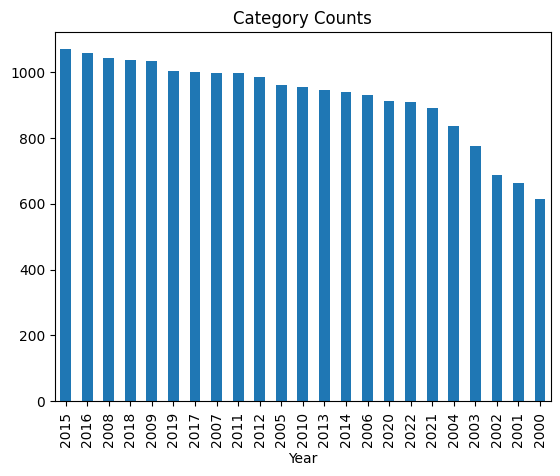

In [544]:
year_counts = cleaned_df['Year'].value_counts()
year_counts.plot(kind='bar', title='Category Counts')
plt.show()

Discovering `Engine Size` Column 

In [545]:
df_copy.head()

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Comb (Mpg),Emissions
0,2003,FORD,EXPLORER SPORT TRAC 4X4,PICKUP TRUCK - STANDARD,4.0,6.0,A5,X,15.4,10.7,13.3,21.0,306.0
1,2000,DAEWOO,LANOS,SUBCOMPACT,1.5,4.0,A4,X,9.9,5.9,8.1,35.0,186.0
2,2018,HONDA,CIVIC SEDAN,MID-SIZE,2.0,4.0,AV,X,7.8,6.0,7.0,40.0,163.0
3,2008,SAAB,9-3 CONVERTIBLE TURBO,SUBCOMPACT,2.8,6.0,AS6,Z,14.5,8.3,11.7,24.0,269.0
4,2005,HYUNDAI,TUCSON AWD,SUV,2.7,6.0,A4,X,12.3,8.8,10.7,26.0,246.0


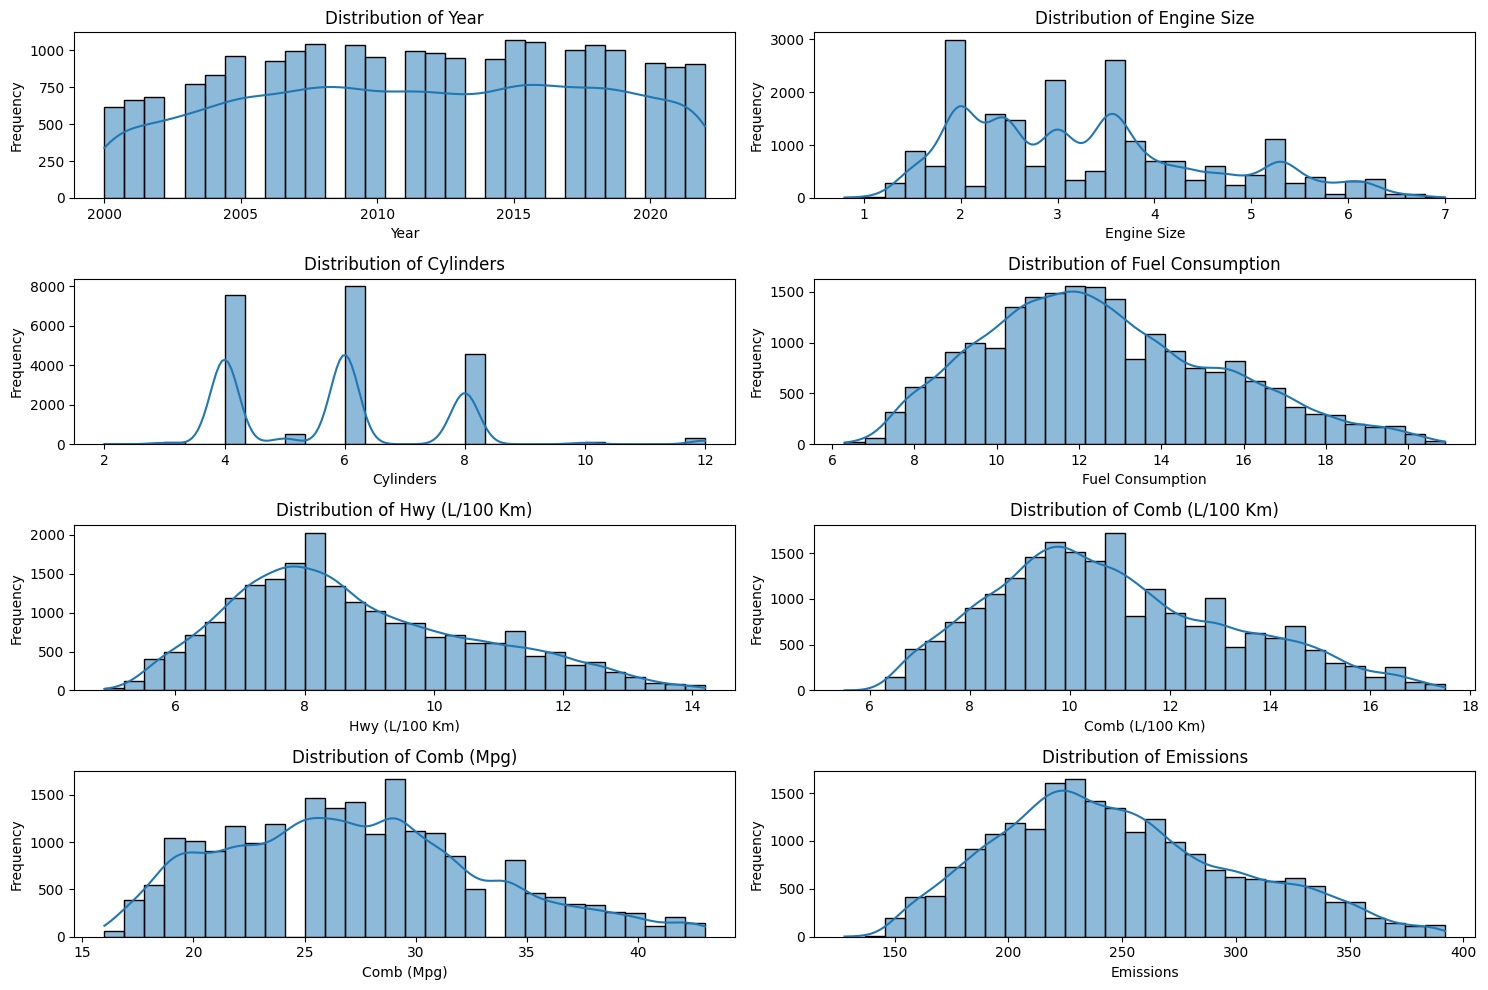

In [564]:
numerical_columns = ['Year','Engine Size', 'Cylinders', 'Fuel Consumption', 'Hwy (L/100 Km)', 'Comb (L/100 Km)', 'Comb (Mpg)', 'Emissions']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(cleaned_df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

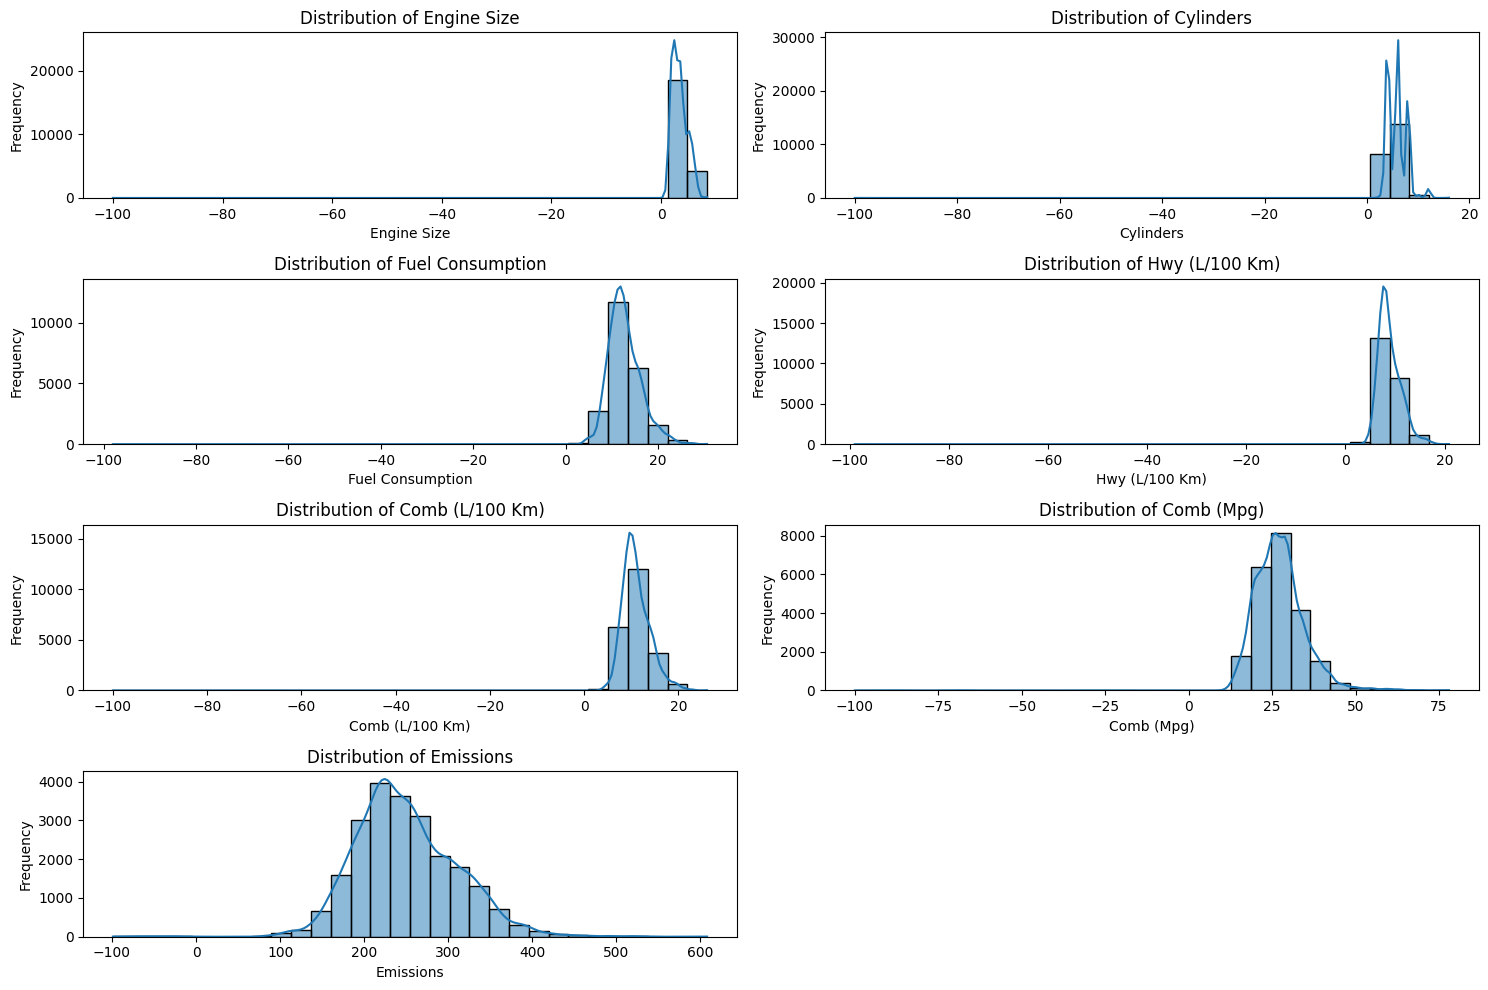

In [547]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**We Can See**
1. `Engine Size`: Multi-modal with peaks around 2.0, 3.0, 4.0, and 6.0 liters, showing common engine configurations.  
2. `Cylinders`: Peaks at 4, 6, and 8 cylinders, reflecting standard engine setups.  
3. `Fuel Consumption`: Right-skewed, with most vehicles consuming 8–14 L/100 km.  
4. `Hwy (L/100 Km)`: Right-skewed, with highway fuel consumption concentrated between 6–10 L/100 km.  
5. `Comb (L/100 Km)`: Right-skewed, with combined fuel consumption mostly between 8–12 L/100 km.  
6. `Comb (Mpg)`: Left-skewed, with most vehicles achieving 20–30 mpg efficiency.  
7. `Emissions`: Right-skewed, with emissions concentrated between 150–300 g/km.  


**Overall Insights:**
Most metrics (fuel consumption, emissions) are right-skewed, meaning a small number of vehicles have extreme values.
Engine size and cylinders show distinct clustering, reflecting common engine configurations.
Combined fuel efficiency (mpg and L/100 km) and emissions align with engine size trends, suggesting relationships between engine size, fuel efficiency, and emissions.
This analysis suggests that fuel efficiency and emissions are key factors influenced by engine size and cylinder count.


Box Plot Analysis

In [2]:
numerical_columns = ['Engine Size', 'Cylinders', 'Fuel Consumption', 'Hwy (L/100 Km)', 'Comb (L/100 Km)', 'Comb (Mpg)', 'Emissions']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=cleaned_df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

Here’s a quick analysis of the box plots:

1. **Engine Size**: Most data falls between 1.5 and 5 liters, with outliers beyond 6 liters.  
2. **Cylinders**: The majority of vehicles have 4, 6, or 8 cylinders, with a few outliers at 10 and 12 cylinders.  
3. **Fuel Consumption**: Most vehicles consume between 8–14 L/100 km, with higher values beyond 18 L/100 km as outliers.  
4. **Hwy (L/100 Km)**: Highway consumption centers between 6–10 L/100 km, with outliers exceeding 12 L/100 km.  
5. **Comb (L/100 Km)**: Combined fuel consumption ranges between 8–14 L/100 km, with a few outliers above 16 L/100 km.  
6. **Comb (Mpg)**: Most vehicles achieve 20–35 mpg, with higher efficiency values (above 40 mpg) as outliers.  
7. **Emissions**: Emissions are concentrated between 150–300 g/km, with extreme values exceeding 350 g/km as outliers.  

Overall, the box plots highlight the presence of outliers in **engine size**, **cylinders**, and **fuel consumption**, suggesting variability in larger engines and high fuel-consuming vehicles.

C:\Users\arsya\AppData\Local\Temp\ipykernel_41456\3211665104.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  make_model_unique = cleaned_df.groupby('Make')['Model'].nunique()


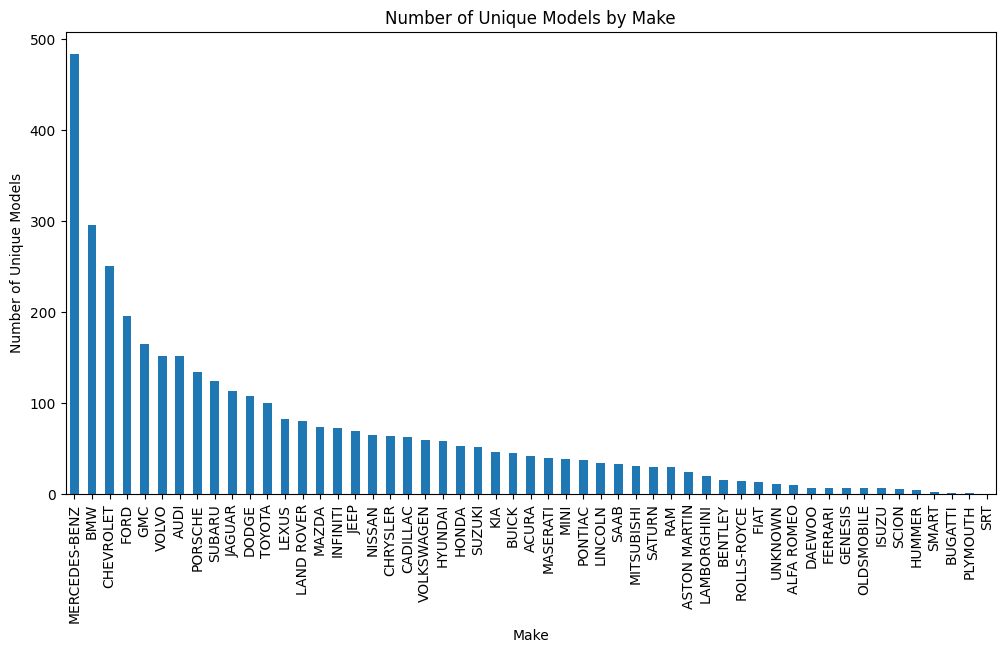

In [549]:
make_model_unique = cleaned_df.groupby('Make')['Model'].nunique()
pd.DataFrame(make_model_unique.sort_values(ascending=False))
make_model_unique.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.xlabel('Make')
plt.ylabel('Number of Unique Models')
plt.title('Number of Unique Models by Make')
plt.xticks(rotation=90)
plt.show()

In [550]:
vehicle_class_make_unique = cleaned_df.groupby('Vehicle Class')['Make'].nunique()
vehicle_class_make_unique.sort_values(ascending=False)

C:\Users\arsya\AppData\Local\Temp\ipykernel_41456\4158742795.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehicle_class_make_unique = cleaned_df.groupby('Vehicle Class')['Make'].nunique()


Vehicle Class
MID-SIZE                    39
COMPACT                     37
SUV                         35
SUBCOMPACT                  33
SUV: SMALL                  31
SUV - SMALL                 30
TWO-SEATER                  29
SUV: STANDARD               26
FULL-SIZE                   26
STATION WAGON - SMALL       25
SUV - STANDARD              22
MINIVAN                     16
MINICOMPACT                 15
STATION WAGON - MID-SIZE    13
PICKUP TRUCK - STANDARD     13
STATION WAGON: SMALL        12
UNKNOWN                     12
PICKUP TRUCK - SMALL         9
PICKUP TRUCK: STANDARD       8
PICKUP TRUCK: SMALL          6
SPECIAL PURPOSE VEHICLE      6
STATION WAGON: MID-SIZE      5
VAN - CARGO                  4
VAN - PASSENGER              4
VAN: PASSENGER               1
Name: Make, dtype: int64

### Top `Make, Model, and Vehicle Class` based on `Year`

In [551]:
year_most_frequent = cleaned_df.groupby('Year').agg({
    'Model': lambda x: x.value_counts().index[0],
    'Make': lambda x: x.value_counts().index[0],
    'Vehicle Class': lambda x: x.value_counts().index[0]
})
year_most_frequent

,Model,Make,Vehicle Class
Year,,,
2000,JETTA,FORD,COMPACT
2001,RAM 1500,FORD,COMPACT
2002,JETTA,FORD,COMPACT
2003,RANGER,FORD,SUV
2004,MUSTANG,CHEVROLET,SUV
2005,RANGER,CHEVROLET,SUV
2006,C1500 SIERRA,CHEVROLET,SUV
2007,RANGER,CHEVROLET,SUV
2008,RANGER,CHEVROLET,SUV


**We can see:**
- 

C:\Users\arsya\AppData\Local\Temp\ipykernel_41456\468023870.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  make_mean_engine_size_above_avg = cleaned_df.groupby('Make')['Engine Size'].mean()


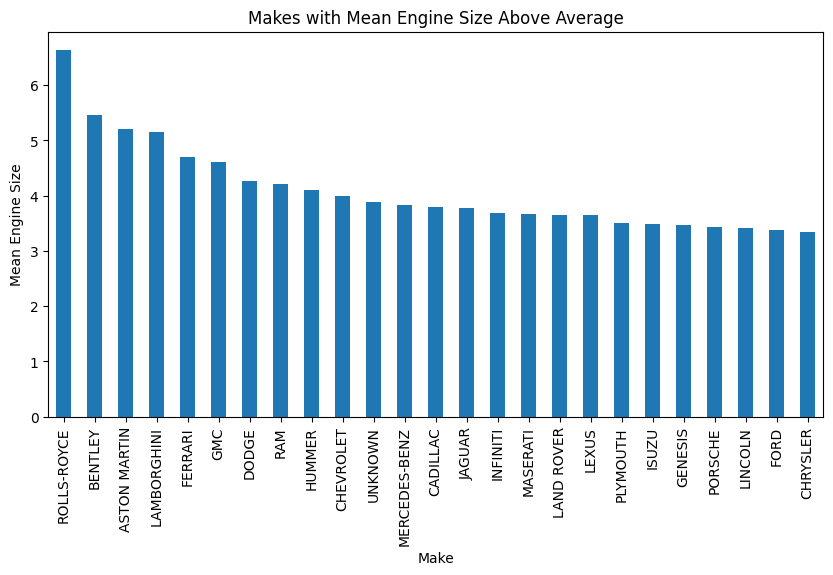

In [552]:
make_mean_engine_size_above_avg = cleaned_df.groupby('Make')['Engine Size'].mean()
make_mean_engine_size_above_avg = make_mean_engine_size_above_avg[make_mean_engine_size_above_avg > cleaned_df['Engine Size'].mean()].sort_values(ascending=False)
plt.figure(figsize=(10, 5))
make_mean_engine_size_above_avg.plot(kind='bar')
plt.xlabel('Make')
plt.ylabel('Mean Engine Size')
plt.title('Makes with Mean Engine Size Above Average')
plt.xticks(rotation=90)
plt.show()

C:\Users\arsya\AppData\Local\Temp\ipykernel_41456\1257183820.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  make_most_frequent_transmission = cleaned_df.groupby('Make')['Transmission'].agg(lambda x: x.value_counts().index[0])


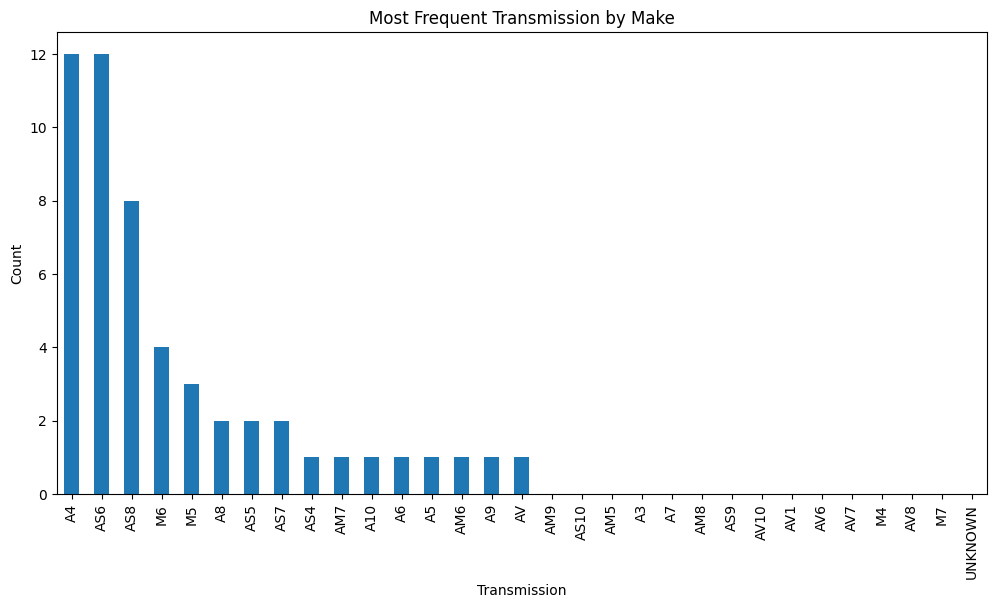

In [569]:
make_most_frequent_transmission = cleaned_df.groupby('Make')['Transmission'].agg(lambda x: x.value_counts().index[0])
make_most_frequent_transmission_counts = make_most_frequent_transmission.value_counts()
make_most_frequent_transmission_counts.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.title('Most Frequent Transmission by Make')
plt.xticks(rotation=90)
plt.show()

C:\Users\arsya\AppData\Local\Temp\ipykernel_41456\1779359617.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuel_transmission_unique = cleaned_df.groupby('Fuel')['Transmission'].nunique()


<Axes: xlabel='Transmission'>

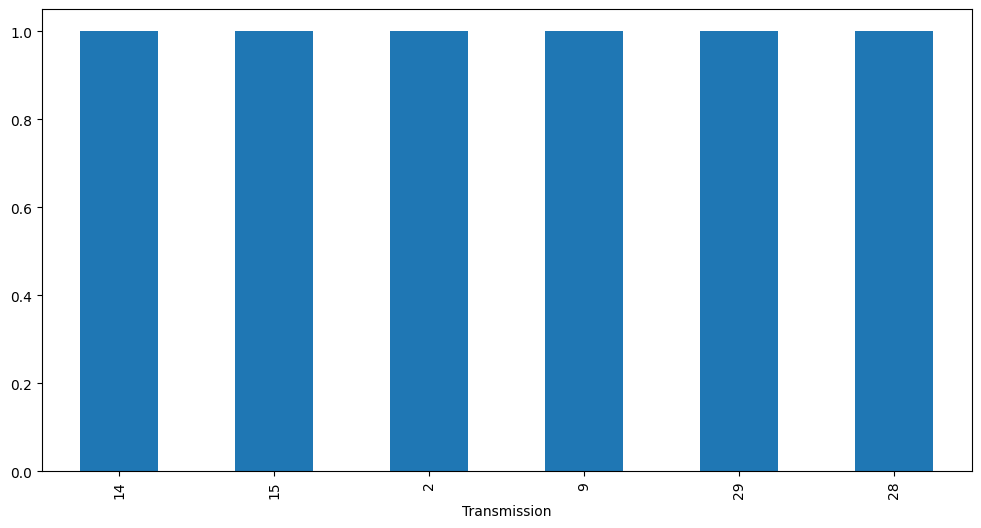

In [555]:
fuel_transmission_unique = cleaned_df.groupby('Fuel')['Transmission'].nunique()
most_fuel_transmission_unique = fuel_transmission_unique.value_counts()
most_fuel_transmission_unique.plot(kind='bar', figsize=(12, 6))

C:\Users\arsya\AppData\Local\Temp\ipykernel_41456\1830458248.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transmission_fuel_consumption_above_avg = cleaned_df.groupby('Transmission')['Fuel Consumption'].mean()


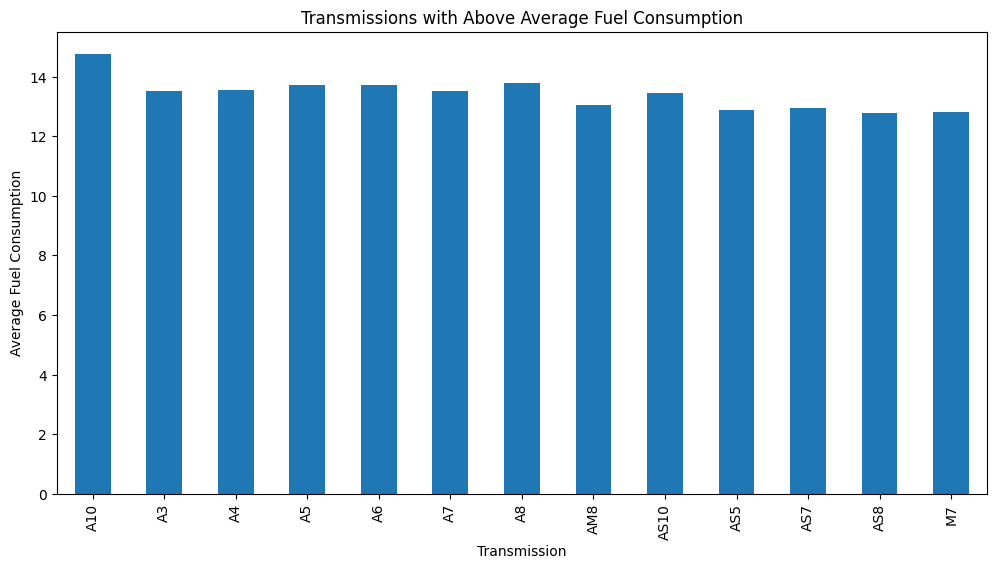

In [556]:
transmission_fuel_consumption_above_avg = cleaned_df.groupby('Transmission')['Fuel Consumption'].mean()
transmission_fuel_consumption_above_avg = transmission_fuel_consumption_above_avg[transmission_fuel_consumption_above_avg > cleaned_df['Fuel Consumption'].mean()]
plt.figure(figsize=(12, 6))
transmission_fuel_consumption_above_avg.plot(kind='bar')
plt.xlabel('Transmission')
plt.ylabel('Average Fuel Consumption')
plt.title('Transmissions with Above Average Fuel Consumption')
plt.xticks(rotation=90)
plt.show()

C:\Users\arsya\AppData\Local\Temp\ipykernel_41456\689006318.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuel_emission_above_avg = cleaned_df.groupby('Fuel')['Emissions'].mean()


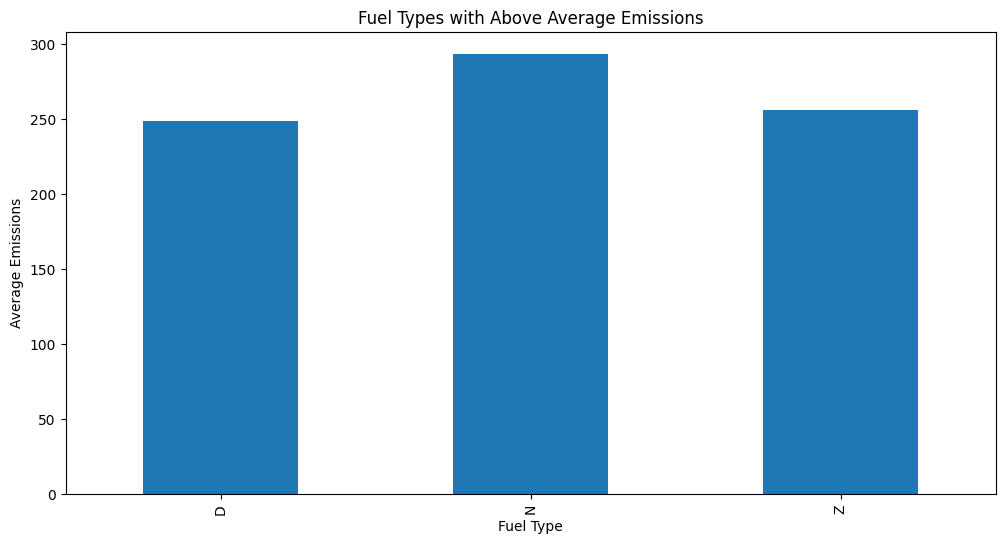

In [557]:
fuel_emission_above_avg = cleaned_df.groupby('Fuel')['Emissions'].mean()
fuel_emission_above_avg = fuel_emission_above_avg[fuel_emission_above_avg > cleaned_df['Emissions'].mean()]
plt.figure(figsize=(12, 6))
fuel_emission_above_avg.plot(kind='bar')
plt.xlabel('Fuel Type')
plt.ylabel('Average Emissions')
plt.title('Fuel Types with Above Average Emissions')
plt.xticks(rotation=90)
plt.show()

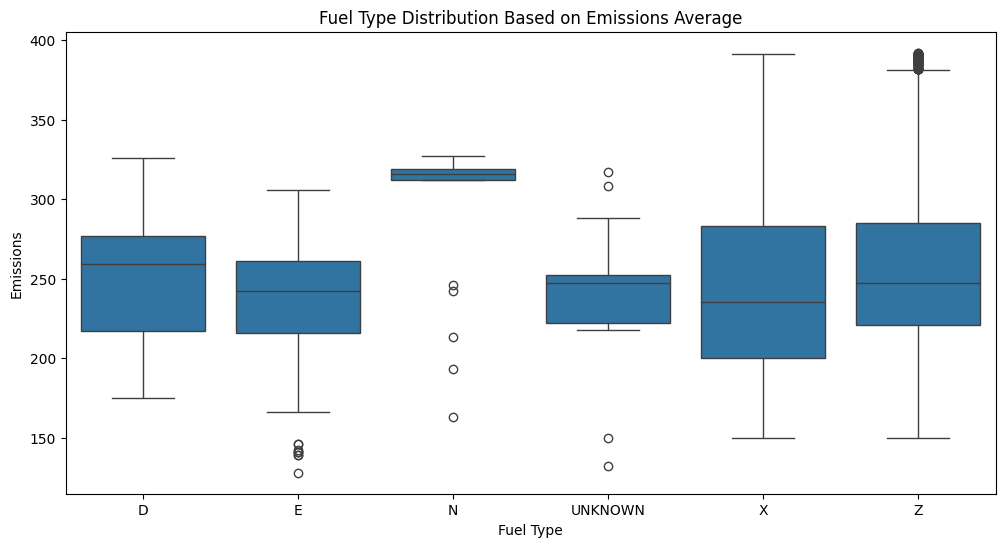

In [558]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuel', y='Emissions', data=cleaned_df)
plt.xlabel('Fuel Type')
plt.ylabel('Emissions')
plt.title('Fuel Type Distribution Based on Emissions Average')
plt.show()

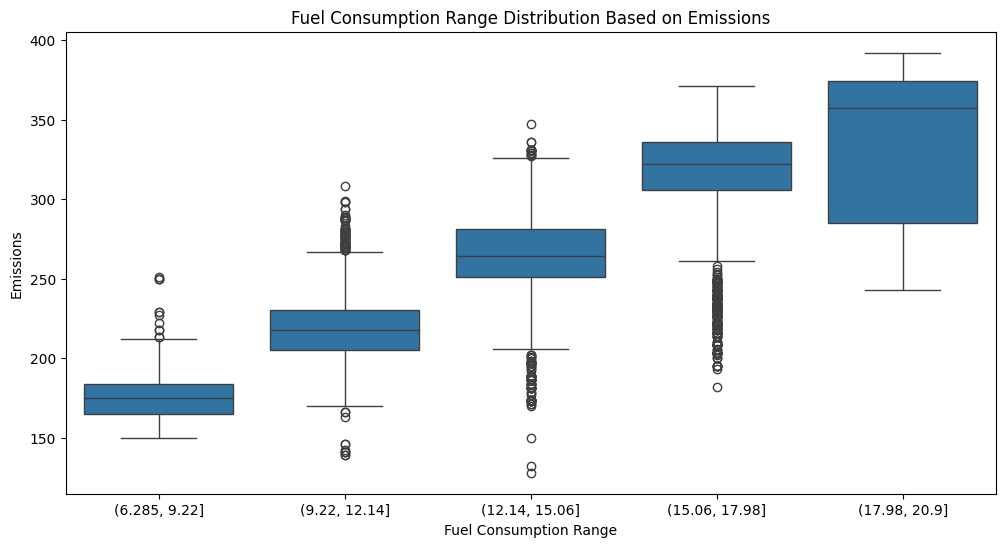

In [559]:
cleaned_df['Fuel Consumption Range'] = pd.cut(cleaned_df['Fuel Consumption'], bins=5)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuel Consumption Range', y='Emissions', data=cleaned_df)
plt.xlabel('Fuel Consumption Range')
plt.ylabel('Emissions')
plt.title('Fuel Consumption Range Distribution Based on Emissions')
plt.show()

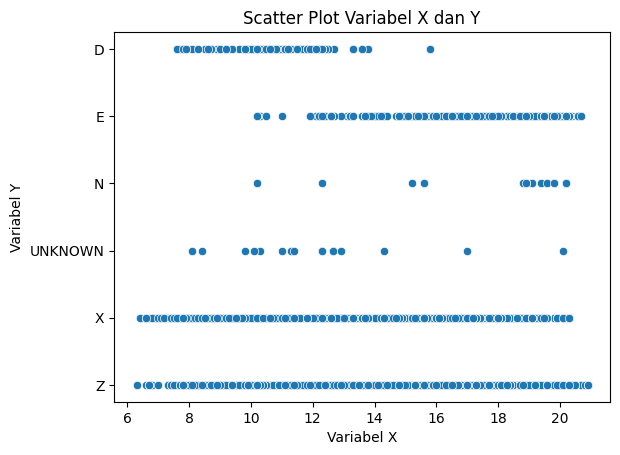

In [560]:
sns.scatterplot(x=cleaned_df['Fuel Consumption'], y=cleaned_df['Fuel'])
plt.xlabel('Variabel X')
plt.ylabel('Variabel Y')
plt.title('Scatter Plot Variabel X dan Y')
plt.show()

**We Can See**

## Data Preprocessing

1. Handling Missing Values:
 - Remove missing values: If the dataset has rows with missing values, you can remove them.
 - Impute missing values: Replace missing values with a statistical measure (mean, median, mode) or use more sophisticated methods like K-Nearest Neighbors (KNN) imputation.

2. Encoding Categorical Variables
 - Label Encoding: Convert categorical values into numerical values.
 - One-Hot Encoding: Create binary columns for each category.

3. Feature Scaling 
 - Normalization: Scale the data to a range of [0, 1].
 - Standardization: Scale the data to have a mean of 0 and a standard deviation of 1.

4. Handling Outliers
- Remove outliers: Identify and remove outliers from the dataset.
- Transform outliers: Apply transformations to reduce the impact of outliers.

5. Feature Engineering:
  - Create new features: Combine existing features to create new ones.
  - Polynomial features: Generate polynomial and interaction features.

6. Dimensionality Reduction:
PCA (Principal Component Analysis): Reduce the number of features while retaining most of the variance.
LDA (Linear Discriminant Analysis): Reduce dimensions while preserving class separability.